In [8]:
import os
import sys
sys.path.append(os.path.join('..'))


from functions import Elements,Impurete_Elements,ONO_Elements,Ferrite_Elements,THIELMANN_Elements
from functions import MAYER_Elements,Indicateurs,Impurete,Ferrite,ONO,THIELMANN,MAYER,Quality_ref

from functions import compute_correlation,compute_mean_absolute_correlation,print_correlation_results
from functions import linear_regression_with_predict_intervals
from functions import plot_linear_regression_with_predict_intervals
from functions import  compute_confidence_interval ,export_IC_data
from functions import remove_outliers,export_outliers_and_cleaned_data,plot_and_save
from functions import fusion_and_clean_excel_files,add_quality,keep_GS_and_add_quality,split_GS

In [2]:
# Chemins des fichiers Excel à fusionner
TRACTION2023 = os.path.join('..', 'data', 'données brut', 'TRACTION2023.xlsx')
TRACTION2024 = os.path.join('..', 'data', 'données brut', 'TRACTION2024.xlsx')
TRACTION = os.path.join('..', 'data', 'données brut', 'TRACTION.xlsx')

files_list = [TRACTION]
files_list = [TRACTION2023,TRACTION2024]

output_dir = os.path.join('..', 'data', 'données nettoyées')
# choix de la recette
recipe_name = 'GS 600-3'

### Le pre-traitement

In [3]:
# Lancement du pre-traitement
df = fusion_and_clean_excel_files(files_list)
df = keep_GS_and_add_quality(df)

df_nonconforme, df_conforme = split_GS(recipe_name, df)

### Sélection/Classement des 5 indicateurs qualités

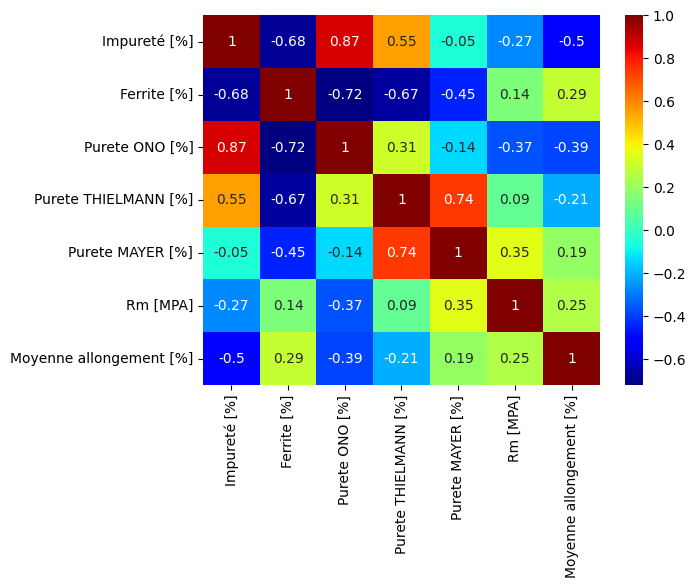

In [4]:
file_name = "Matrice_corrélation_qualite_indicateur.pdf"
corr_matrix = compute_correlation(df_conforme , Indicateurs, Quality_ref,plot=True, file_path =file_name)

In [5]:
corr_matrix_sorted = compute_mean_absolute_correlation(df_conforme, Indicateurs, Quality_ref)
print_correlation_results(Quality_ref, corr_matrix_sorted)

Résultats de la corrélation entre Rm [MPA], Moyenne allongement [%] et les autres variables :
   Impureté [%]: 0.3850248220674067
   Purete ONO [%]: 0.38012667567629377
   Purete MAYER [%]: 0.26723641361911266
   Ferrite [%]: 0.21612963841416533
   Purete THIELMANN [%]: 0.14607165721810497


### Gestions des valeurs extrême

In [6]:
df_conforme_without_outliers = export_outliers_and_cleaned_data(df_conforme, recipe_name, output_dir)

### Intervalle de confiance


Exportation des intervalles de confiance

In [7]:
IC_column = ['Impureté [%]',  'Purete ONO [%]'] + Elements
export_IC_data(recipe_name, output_dir,df_conforme_without_outliers,IC_column, confidence=1.96)